In [2]:
conda install nb_conda

SyntaxError: invalid syntax (<ipython-input-2-b640c8eece85>, line 1)

In [1]:
import dipy.data as dpd
import dipy.tracking.utils as dtu

In [4]:
dpd.fetch_bundles_2_subjects()

Data size is approximately 234MB


HTTPError: HTTP Error 404: Not Found

In [3]:
bd = dpd.read_bundles_2_subjects()

FileNotFoundError: No such file: '/Users/aarya/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/fa_1x1x1.nii.gz'

In [4]:
ls /Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/

bundles_af.left.trk      bundles_cg.left.trk      bundles_mdlf.right.trk
bundles_af.right.trk     bundles_cg.right.trk     bundles_slf1.left.trk
bundles_cc_1.trk         bundles_cst.left.trk     bundles_slf1.right.trk
bundles_cc_2.trk         bundles_cst.right.trk    bundles_slf2.left.trk
bundles_cc_3.trk         bundles_ifof.left.trk    bundles_slf2.right.trk
bundles_cc_4.trk         bundles_ifof.right.trk   bundles_slf_3.left.trk
bundles_cc_5.trk         bundles_ilf.left.trk     bundles_slf_3.right.trk
bundles_cc_6.trk         bundles_ilf.right.trk    bundles_uf.left.trk
bundles_cc_7.trk         bundles_mdlf.left.trk    bundles_uf.right.trk


In [5]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
DATA_SUB1 = '/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1'

In [7]:
import os.path as op
from glob import glob

In [8]:
bundle_fnames = glob(op.join(DATA_SUB1, 'bundles/*.trk'))

In [9]:
import nibabel as nib
t1_warped_img = nib.load(op.join(DATA_SUB1, 't1_warped.nii.gz'))

In [10]:
sl_sum = 0
for b_idx, bundle in enumerate(bundle_fnames):
    tgram = nib.streamlines.load(op.join(DATA_SUB1, 'bundles', bundle))
    print(bundle, len(tgram.streamlines))
    sl_sum += len(tgram.streamlines)

/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_af.left.trk 721
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_af.right.trk 2093
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cc_1.trk 478
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cc_2.trk 953
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cc_3.trk 15244
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cc_4.trk 1970
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cc_5.trk 520
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cc_6.trk 3620
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cc_7.trk 703
/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cg.left.trk 3856
/Users/arokem/.dipy/exp_

In [11]:
((sl_sum, ) + t1_warped_img.shape + (1,))

(46156, 256, 256, 150, 1)

In [16]:
ii = 0
for b_idx, bundle in enumerate(bundle_fnames):
    tgram = nib.streamlines.load(op.join(DATA_SUB1, 'bundles', bundle))
    print(bundle, len(tgram.streamlines))
    sl_sum += len(tgram.streamlines)
    for sl_idx, sl in enumerate(list(dtu.move_streamlines(tgram.streamlines, np.linalg.inv(tgram.affine)))):
            if not np.mod(sl_idx, 100):
                print("Streamline {0} at index {1}".format(sl_idx, ii))
            vol = np.zeros(t1_warped_img.shape + (1,), dtype=bool)
            sl = np.round(sl).astype(int).T
            vol[sl[0], sl[1], sl[2]] = 1        
            ii += 1

/Users/arokem/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_af.left.trk 721
Streamline 0 at index 0


NameError: name 'boom' is not defined

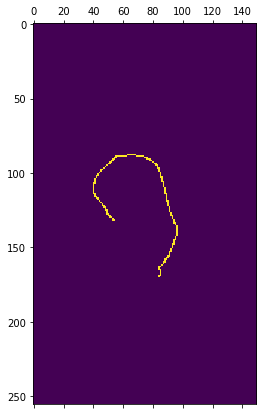

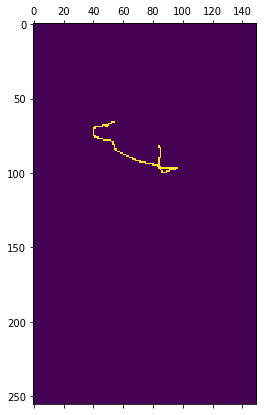

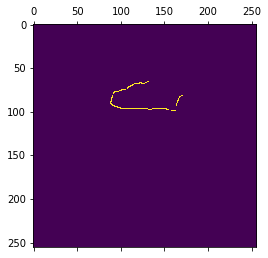

In [24]:
for ax in range(3):
    foo = np.max(vol, ax).squeeze()
    plt.matshow(foo)

In [22]:
foo.shape

(256, 150)

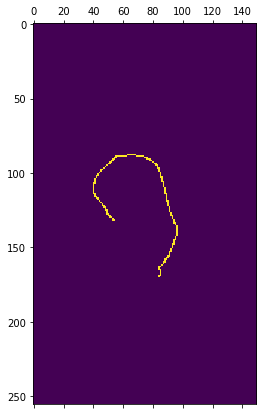

In [26]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')
ii = 0
for b_idx, bundle in enumerate(bundle_fnames):
    tgram = nib.streamlines.load(op.join(DATA_SUB1, 'bundles', bundle))
    print(bundle, len(tgram.streamlines))
    sl_sum += len(tgram.streamlines)
    for sl_idx, sl in enumerate(list(dtu.move_streamlines(tgram.streamlines, np.linalg.inv(tgram.affine)))):
            if not np.mod(sl_idx, 100):
                print("Streamline {0} at index {1}".format(sl_idx, ii))
#         sl_npy_fname = op.join('/data/bundles/npy/','_'.join(op.split(bundle)[-1].split('.')[:2]) + '{0:05d}.npy'.format(sl_idx + 1))
#         if not op.exists(sl_npy_fname):
            vol = np.zeros(t1_warped_img.shape + (1,), dtype=bool)
            sl = np.round(sl).astype(int).T
            vol[sl[0], sl[1], sl[2]] = 1        
            bundle_arr[ii] = vol
            one_hot = np.zeros(len(bundle_fnames), dtype=bool)
            one_hot[b_idx] = 1
            one_hot_arr[ii] = one_hot
            ii += 1
#             np.save(sl_npy_fname, vol)

/home/ariel/.dipy/exp_bundles_and_maps/bundles_2_subjects/subj_1/bundles/bundles_cg.left.trk 3856
Streamline 0 at index 0
Streamline 100 at index 100
Streamline 200 at index 200
Streamline 300 at index 300
Streamline 400 at index 400
Streamline 500 at index 500
Streamline 600 at index 600
Streamline 700 at index 700
Streamline 800 at index 800
Streamline 900 at index 900
Streamline 1000 at index 1000
Streamline 1100 at index 1100
Streamline 1200 at index 1200
Streamline 1300 at index 1300
Streamline 1400 at index 1400
Streamline 1500 at index 1500
Streamline 1600 at index 1600
Streamline 1700 at index 1700
Streamline 1800 at index 1800
Streamline 1900 at index 1900
Streamline 2000 at index 2000
Streamline 2100 at index 2100
Streamline 2200 at index 2200
Streamline 2300 at index 2300
Streamline 2400 at index 2400
Streamline 2500 at index 2500
Streamline 2600 at index 2600
Streamline 2700 at index 2700
Streamline 2800 at index 2800
Streamline 2900 at index 2900
Streamline 3000 at index 3